## Class Coding Details

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
os.getcwd()
os.chdir('/Users/fizz/Document/Notes/Python/codes')

In [ ]:
class name(superclass, ...):
    attr = value
    def method(self, ...):
        self.attr = value
        
instance.method(args, ...)
class.method(instance, args...)

In [ ]:
class Super:
    def __init__(self, x):
        ...default code...
class Sub(Super):
    def __init__(self, x, y):
        Super.__init__(self, x)
        ...custom code...
I = Sub(1, 2)

Assignment (*object.X = value*)

Creates or alters the attribute name X in the namespace of the *object* being qualified, and none other. Inheritance-tree climbing happens only on attribute reference, not on attribute assignment.

## !!!!!!!
Although classes have access to enclosing function's scopes, though, they do not act as enclosing scopes to code nested within the class: Python searches enclosing functions for referenced names, but **never** any enclosing classes. That is, a class is a local scope and has access to enclosing local scopes, but it does not *serve* as an enclosing local scope to further nested code. Because the search for names used in method functions skips the enclosing class, class attributes must be fetched as object attributes using inheritance.

In [7]:
# Here is an example
X = 1
def nester():
    X = 2
    print(X)
    class C:
        X = 3
        print(X)
        def method1(self):
            print(X)
            print(self.X)
        def method2(self):
            X = 4
            print(X)
            self.X = 5
            print(self.X)
    I = C()
    I.method1()
    I.method2()
print(X)
nester()
print('-' * 40)

1
2
3
2
3
4
5
----------------------------------------


In [11]:
#!python
"""
classtree.py: Climb inheritance trees using namespace links, displaying
higher superclass with indentation for height
"""
def classtree(cls, indent):
    print('.' * indent + cls.__name__)
    for supercls in cls.__bases__:
        classtree(supercls, indent + 3)
def instancetree(inst):
    print('Tree of %s' % inst)
    classtree(inst.__class__, 3)
def selftest():
    class A: pass
    class B(A): pass
    class C(A): pass
    class D(B,C): pass 
    class E: pass 
    class F(D,E): pass 
    instancetree(B()) 
    instancetree(F())
if __name__ == '__main__': selftest()

Tree of <__main__.selftest.<locals>.B object at 0x1098c2e80>
...B
......A
.........object
Tree of <__main__.selftest.<locals>.F object at 0x1098c2e80>
...F
......D
.........B
............A
...............object
.........C
............A
...............object
......E
.........object


## Operator Overloading

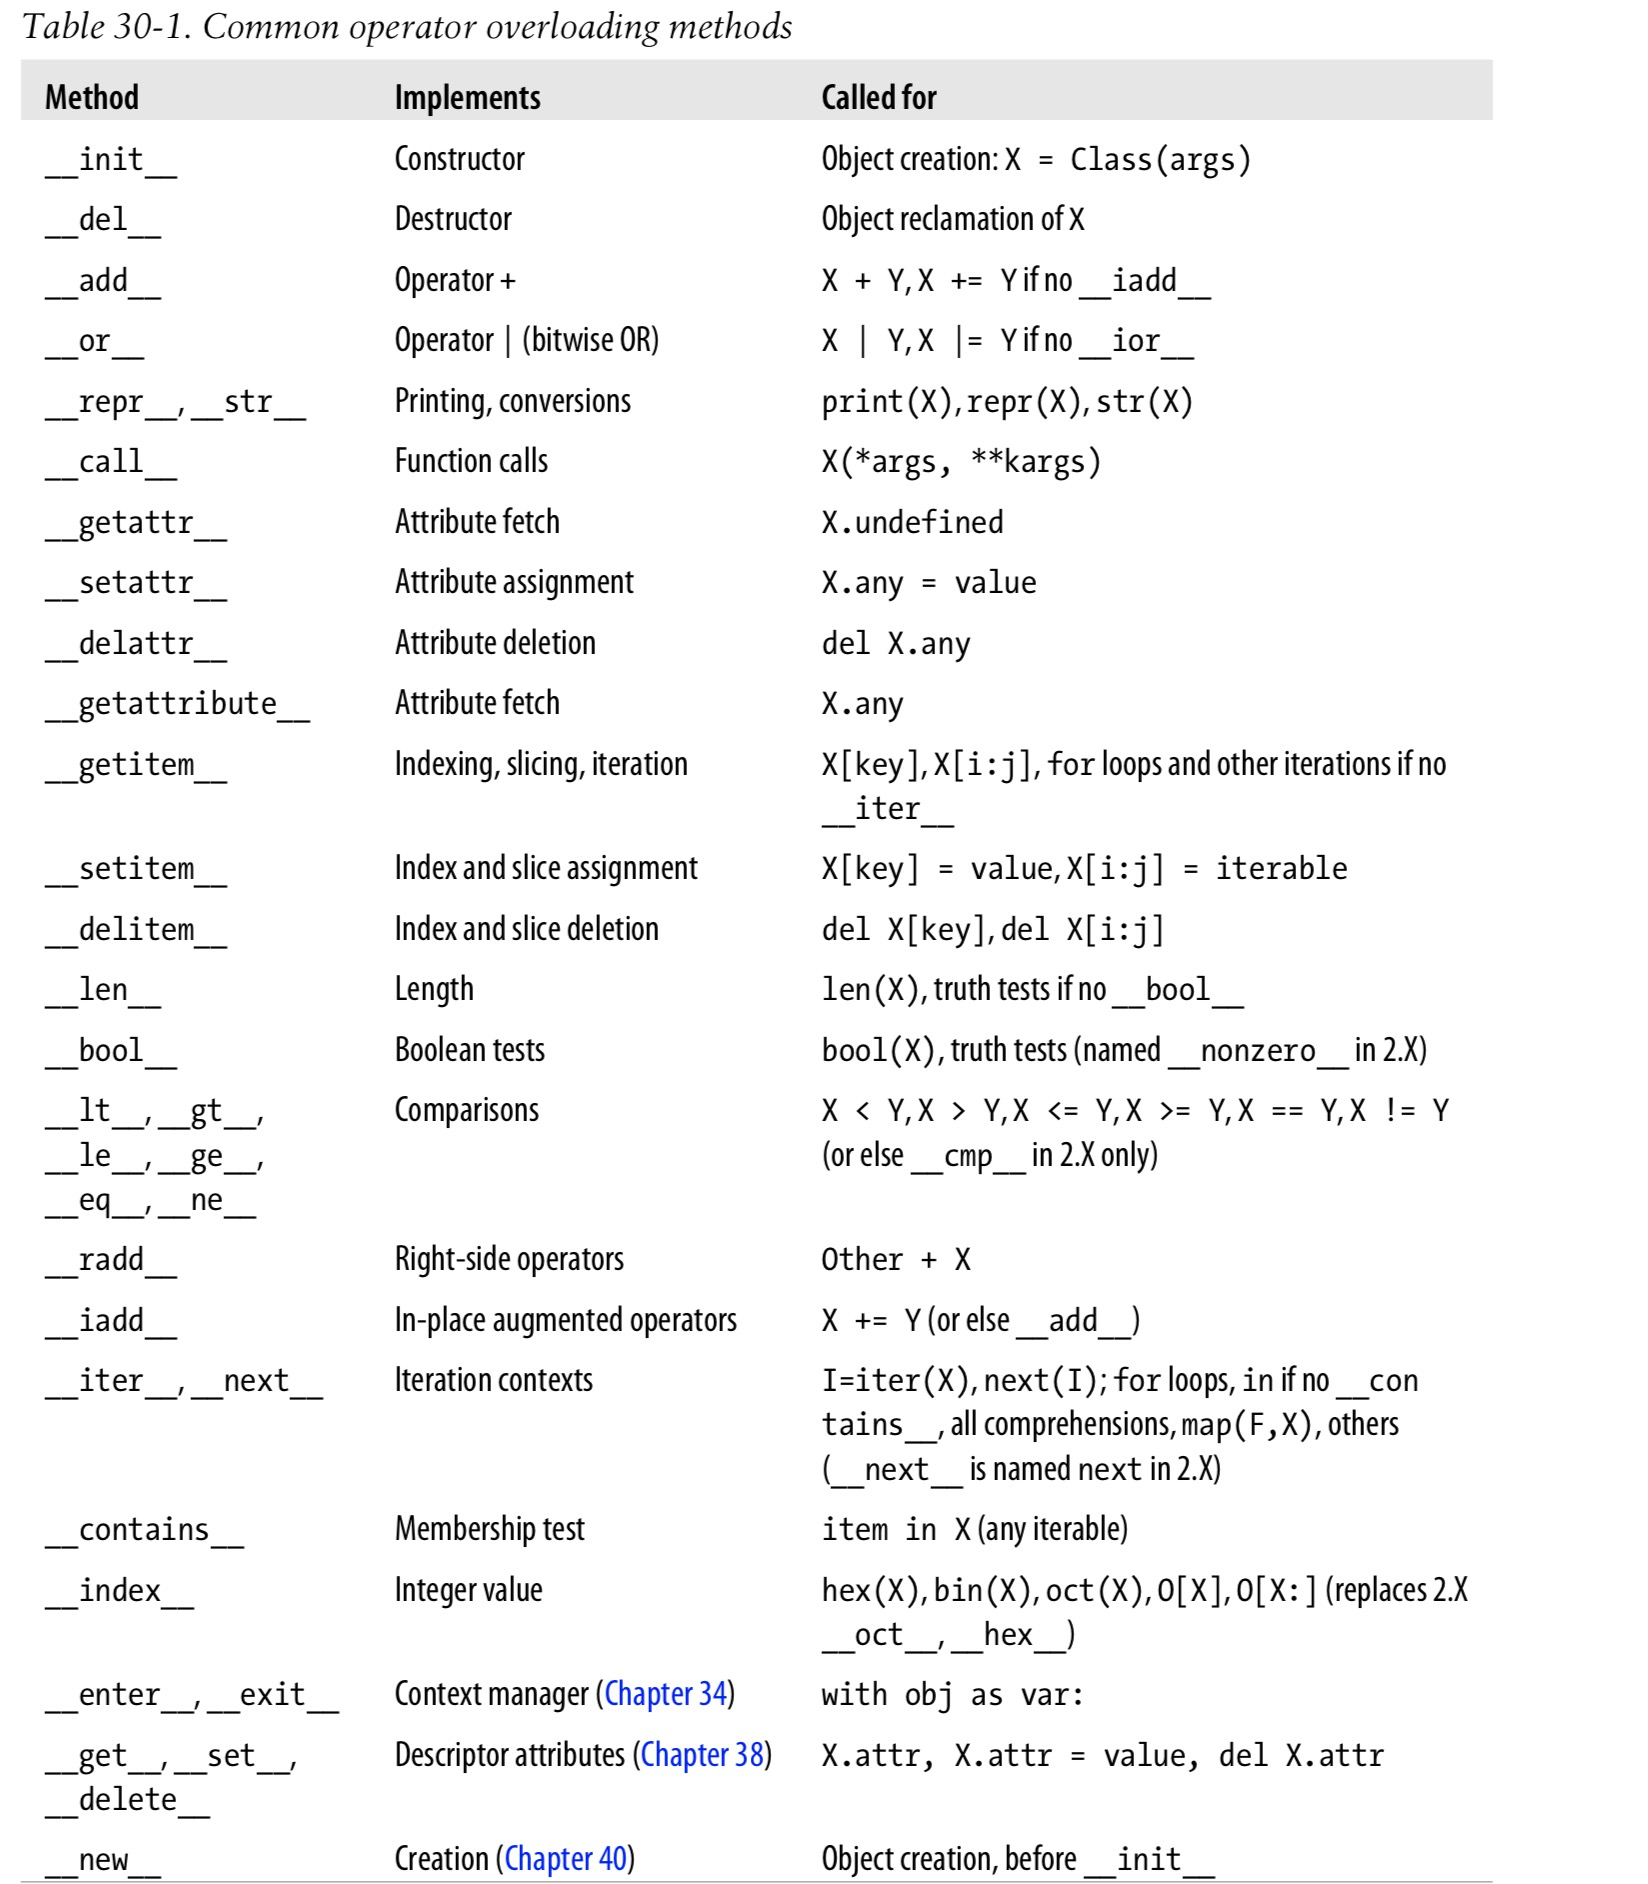

In [3]:
from IPython.display import Image
Image(filename='overload.jpg')

In [7]:
L = [5, 6, 7, 8, 9]
L[slice(2, 4)]
L[slice(1, None)]
L[slice(None, -1)]
L[slice(None, None, 2)]
t = slice(2,4)
t.start, t.stop, t.step

[7, 8]

[6, 7, 8, 9]

[5, 6, 7, 8]

[5, 7, 9]

(2, 4, None)

In [8]:
class Indexer:
    data = [5, 6, 7, 8, 9]
    def __getitem__(self, index):
        print('getitem', index)
        return self.data[index]
    def __setitem__(self, index, value):
        ...
        self.data[index] = value
X = Indexer()
X[-1]
X[2:4]

getitem -1


9

getitem slice(2, 4, None)


[7, 8]

In [9]:
# In the absence of more-specific iteration methods, the for statement works by
# repeatedly indexing a sequence from zero to higher indexes, until an out-of-bounds
# IndexError exception is detected.
class StepperIndex:
    def __getitem__(self, i):
        return self.data[i]
X = StepperIndex()
X.data= 'Spam'
for item in X:
    print(item, end=' ')

S p a m 

In [12]:
# Any class that supports for loops automatically supports all iteration contexts in
# Python. 
'p' in X
[c for c in X]
list(map(str.upper, X))
(a, b, c, d) = X
list(X), tuple(X), ''.join(X)
X

True

['S', 'p', 'a', 'm']

['S', 'P', 'A', 'M']

(['S', 'p', 'a', 'm'], ('S', 'p', 'a', 'm'), 'Spam')

In [27]:
class Squares:
    def __init__(self, start, stop):
        self.value = start - 1
        self.stop = stop
    def __iter__(self):
        return self
    def __next__(self):
        if self.value == self.stop:
            raise StopIteration
        self.value += 1
        return self.value ** 2

for i in Squares(1, 5):
    print(i, end=' ')
X = Squares(1, 5)
I = iter(X)
next(I)

1 4 9 16 25 

1

In [28]:
class SkipObject:
    def __init__(self, wrapped):
        self.wrapped = wrapped
    def __iter__(self):
        return SkipIterator(self.wrapped)
class SkipIterator:
    def __init__(self, wrapped):
        self.wrapped = wrapped
        self.offset = 0
    def __next__(self):
        if self.offset >= len(self.wrapped):
            raise StopIteration
        else:
            item = self.wrapped[self.offset]
            self.offset += 2
            return item
if  __name__ == '__main__':
    alpha = 'abcdef'
    skipper = SkipObject(alpha)
    I = iter(skipper)
    print(next(I), next(I), next(I))
    
    for x in skipper:
        for y in skipper:
            print(x + y, end=' ')

a c e
aa ac ae ca cc ce ea ec ee 

In [31]:
S = 'abcdef'
S = S[::2]
for x in S:      # Same object, new iterators
    for y in S:
        print(x + y, end=' ')

aa ac ae ca cc ce ea ec ee 

In [38]:
# squares_yield.py
class Squares:
    def __init__(self, start, stop):
        self.start = start
        self.stop = stop
    def __iter__(self):
        for value in range(self.start, self.stop + 1):
            yield value ** 2
            
for i in Squares(1, 5): print(i, end=' ')
S = Squares(1, 5)
S
I = iter(S)
I
next(I)
next(I)

1 4 9 16 25 

<generator object Squares.__iter__ at 0x10eb2bde0>

1

4

Membership: **\_\_contains\_\_, \_\_iter\_\_, and \_\_getitem\_\_**

In the iterations domain, classes can implement the **in** membership operator as an iteration, using either the **\_\_iter\_\_** or **\_\_getitem\_\_** methods. To support more specific membership, though, classes may code a **\_\_contains\_\_** method - when present, this method is preferred over **\_\_iter\_\_**, which is preferred over **\_\_getitem\_\_**. The **\_\_contains\_\_** method should define membership as applying to keys for a *mapping* (and can use quick lookups), and as a search for *sequences*.

In [7]:
# File contains.py
class Iters:
    def __init__(self, value):
        self.data = value
    def __getitem__(self, i):                 # Fallback for iteration
        print('get[%s]:' % i, end='')        # Also for index, slice
        return self.data[i]
    def __iter__(self):                         # Preferred for iteration
        print('iter=> next', end='')          # Allows for multiple active iterators
        for x in self.data:                     # no __next__ to alias to next
            yield x
            print('next', end='')
    def __contains__(self, x):              # Preferred for 'in'
        print('contains:', end='')
        return x in self.data

if __name__ == '__main__':
    X = Iters([1, 2, 3, 4, 5])
    print(3 in X)
    for i in X:
        print(i, end=' | ')
    print()
    print([i ** 2 for i in X])
    print(list(map(bin, X)))
    
    I = iter(X)
    while True:
        try:
            print(next(I), end=' @ ')
        except StopIteration:
            break
# Watch what happens to this code's output if we comment out its __contains__
# and __iter methods

contains:True
iter=> next1 | next2 | next3 | next4 | next5 | next
iter=> nextnextnextnextnextnext[1, 4, 9, 16, 25]
iter=> nextnextnextnextnextnext['0b1', '0b10', '0b11', '0b100', '0b101']
iter=> next1 @ next2 @ next3 @ next4 @ next5 @ next

iter=> nextnextnextTrue
iter=> next1 | next2 | next3 | next4 | next5 | next
iter=> nextnextnextnextnextnext[1, 4, 9, 16, 25]
iter=> nextnextnextnextnextnext['0b1', '0b10', '0b11', '0b100', '0b101']
iter=> next1 @ next2 @ next3 @ next4 @ next5 @ next

get[0]:get[1]:get[2]:True
get[0]:1 | get[1]:2 | get[2]:3 | get[3]:4 | get[4]:5 | get[5]:
get[0]:get[1]:get[2]:get[3]:get[4]:get[5]:[1, 4, 9, 16, 25]
get[0]:get[1]:get[2]:get[3]:get[4]:get[5]:['0b1', '0b10', '0b11', '0b100', '0b101']
get[0]:1 @ get[1]:2 @ get[2]:3 @ get[3]:4 @ get[4]:5 @ get[5]: